In [1]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import skimage.color
import skimage.io
import skimage as ski
from tqdm.notebook import tqdm

path = 'image_detector/images/'
size = 20

train_images = []
test_images = []

for i in tqdm(range(20)):
    train_image = skimage.io.imread(fname=path + f'Image_{i}.jpg')
    train_images.append(train_image)


Matplotlib created a temporary config/cache directory at /var/folders/zf/49prmn_s7s5861rytkmr3_080000gn/T/matplotlib-4wjb4czv because the default path (/Users/ribells/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


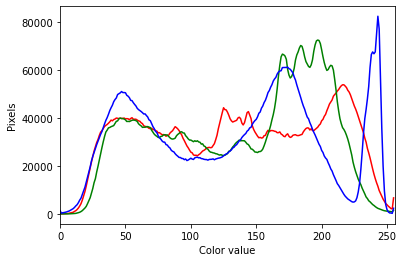

In [8]:
#create a histogram of the image color for any image by index
img_no = 4;

# tuple to select colors of each channel line
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for each color
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        train_images[img_no][:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

plt.show()

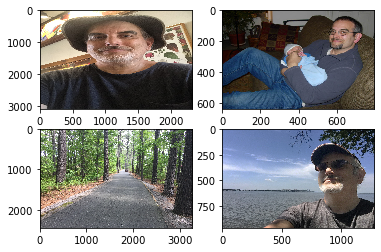

<Figure size 432x288 with 0 Axes>

In [6]:
for i in range(4):
    plt.subplot(220 + 1 + i)
    plt.imshow(np.uint8(train_images[i]), interpolation = 'nearest', aspect='auto')
plt.show()
plt.savefig('train_images.png')

In [23]:
#the iris example dataset for AI use (does not include images)
from sklearn.datasets import load_iris
iris= load_iris()
print(len(iris.data))


150


In [17]:
print(len(iris.data))

150


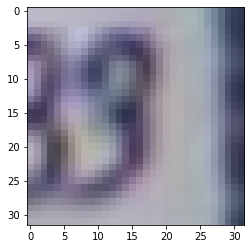

[3]


In [74]:
#The Google house numbers training dataset
import scipy.io

# load our dataset
train_data = scipy.io.loadmat('image_detector/test_32x32.mat')
# extract the images and labels from the dictionary object
X = train_data['X']
y = train_data['y']
# view an image (e.g. 25) and print its corresponding label
img_index = 10
plt.imshow(X[:,:,:,img_index])
plt.show()
print(y[img_index])

In [76]:
# Stanford Tutorial at:
# https://blog.hyperiondev.com/index.php/2019/02/18/machine-learning/

from sklearn.utils import shuffle

X = X.reshape(X.shape[0]*X.shape[1]*X.shape[2],X.shape[3]).T
y = y.reshape(y.shape[0],)
X, y = shuffle(X, y, random_state=42)
print(X)

[[ 97 103  93 ...  76  82  76]
 [ 90  84  84 ... 133 126 116]
 [145 138 128 ... 148 147 134]
 ...
 [173 178 182 ... 161 166 177]
 [151 136 115 ... 152 140 116]
 [115 124 129 ... 150 162 174]]


In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
print(clf)

RandomForestClassifier()


In [6]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

RandomForestClassifier(min_impurity_split=1e-07, n_estimators=10, n_jobs=1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
from sklearn.metrics import accuracy_score
preds = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test,preds))

Accuracy: 0.6696754369118494


In [146]:
# Importing Image from PIL package
from PIL import Image
import random

img_array = []
img_data = []
X = []
Y = []

# creating image objects
for i in range(1000):
    img_data = []
    im = Image.open("image_detector/images/black_background.png")
    px = im.load()
    num_objects = random.randint(0, 10)
    for j in range(num_objects):
        x = random.randint(3, 60)
        y = random.randint(3, 60)
        px[x, y] = (255, 255, 0)
        px[x+1, y] = (255, 255, 0)
        px[x, y+1] = (255, 255, 0)
        px[x+1, y+1] = (255, 255, 0)
        px[x-1, y-1] = (128, 128, 0)
        px[x-1, y] = (128, 128, 0)
        px[x-1, y+1] = (128, 128, 0)
        px[x-1, y+2] = (128, 128, 0)
        px[x+2, y-1] = (128, 128, 0)
        px[x+2, y] = (128, 128, 0)
        px[x+2, y+1] = (128, 128, 0)
        px[x+2, y+2] = (128, 128, 0)
        px[x, y+2] = (128, 128, 0)
        px[x, y-1] = (128, 128, 0)
        px[x+1, y+2] = (128, 128, 0)
        px[x+1, y-1] = (128, 128, 0)
        #print (px[x, y])
    for a in range(0, 64):
        row_data = []
        for b in range(0, 64):
            row_data.append(px[a,b][0])
        img_data.append(row_data)
    X.append(img_data)
    Y.append(str(num_objects))
    img_array.append(im)
    #display(im)

100000


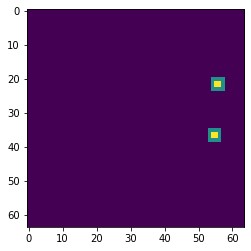

In [147]:
print(len(X))

plt.imshow(X[1])
plt.show()

In [148]:
# compress X to two dimensions:
Z = []
for i in range(len(X)):
    img_data = []
    for a in range(0, 64):        
        for b in range(0, 64):
            img_data.append(X[i][a][b])
    Z.append(img_data)
X = Z
# shuffle the images:
X, y = shuffle(X, Y, random_state=42)

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [150]:
from sklearn.metrics import accuracy_score
preds = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test,preds))

Accuracy: 0.2766


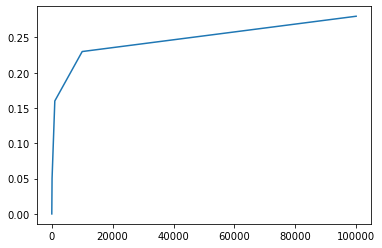

In [156]:
samples = [10, 100, 1000, 10000, 100000]
results = [0, 0.05, 0.16, 0.23, 0.28]

plt.plot(samples, results)

In [162]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)

print("Naive Bays' Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

Naive Bays' Accuracy is:  53.31
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1836
           1       0.92      0.85      0.88      1758
          10       0.54      0.47      0.50      1816
           2       0.70      0.71      0.71      1839
           3       0.55      0.60      0.57      1828
           4       0.45      0.44      0.45      1793
           5       0.42      0.42      0.42      1835
           6       0.37      0.38      0.37      1819
           7       0.32      0.33      0.33      1838
           8       0.30      0.31      0.30      1823
           9       0.35      0.35      0.35      1815

    accuracy                           0.53     20000
   macro avg       0.54      0.53      0.54     20000
weighted avg       0.54      0.53      0.53     20000



In [163]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)

print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  11.075
              precision    recall  f1-score   support

           0       0.10      1.00      0.19      1836
           1       0.00      0.00      0.00      1758
          10       0.18      0.17      0.17      1816
           2       0.00      0.00      0.00      1839
           3       0.00      0.00      0.00      1828
           4       0.00      0.00      0.00      1793
           5       0.00      0.00      0.00      1835
           6       0.00      0.00      0.00      1819
           7       0.00      0.00      0.00      1838
           8       0.14      0.00      0.00      1823
           9       0.16      0.04      0.06      1815

    accuracy                           0.11     20000
   macro avg       0.05      0.11      0.04     20000
weighted avg       0.05      0.11      0.04     20000



/Users/ribells/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(X_train,y_train)

predicted_values = SVM.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)

print("SVM's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train,y_train)

predicted_values = LogReg.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)

print("Logistic Regression' Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))